In [1]:
# Import generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import librosa
import IPython.display as ipd
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv('music.csv')
data.head()

,zcrs,mfccs,chroma,rmse,spec_c,spec_b,rolloff,class_label
0,0.150044,-8.459356,0.388125,0.037607,2612.358748,2139.577794,4620.238729,Human-Speech
1,0.123951,-7.779772,0.405367,0.054338,2159.300344,1991.255180,3995.042509,Human-Speech
2,0.071148,5.206492,0.567012,0.329862,2344.515069,2663.768393,5363.817566,Music
3,0.136798,1.928085,0.449995,0.272583,2985.277462,2790.678112,6261.262139,Music
4,0.126048,-7.293183,0.392444,0.077955,2331.708888,1989.404083,4185.341358,Human-Speech


In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X = scaler.transform(X)
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(215, 7)
(215,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


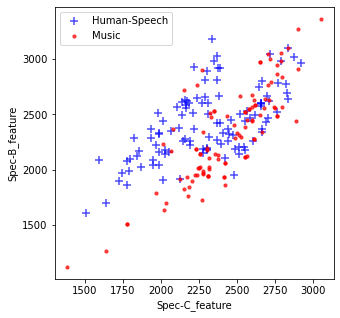

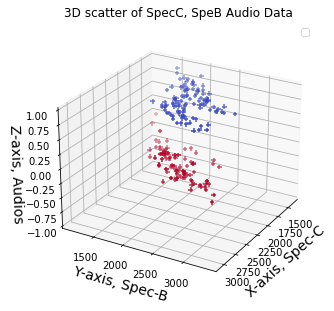

In [38]:
plt.subplots(figsize=(5, 5))
plt.xlabel('Spec-C_feature')
plt.ylabel('Spec-B_feature')
X1=data.iloc[:,-3]
X2=data.iloc[:,-4]
plt.scatter(X1[y=='Human-Speech'], X2[y=='Human-Speech'], c='blue', marker= '+', s=50, alpha=0.7, label='Human-Speech')
plt.scatter(X1[y=='Music'], X2[y=='Music'],c='red', marker='o',s=10, alpha=0.7, label='Music')
plt.legend()


X = np.column_stack((X1,X2))
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(25, 30)
f = []
for i in y:
    if i=="Human-Speech":
        f.append(1)
    else:
        f.append(0)
f=np.array(f)
ax.scatter3D(X[:,0],X[:,1],f,marker='+',c = f<1,s=20,cmap = 'coolwarm')
ax.set_title('3D scatter of SpecC, SpeB Audio Data')
ax.set_xlabel('X-axis, Spec-C',fontsize=14)
ax.set_ylabel('Y-axis, Spec-B',fontsize=14)
ax.set_zlabel('Z-axis, Audios',fontsize=14)
ax.set_zlim(-1,1)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


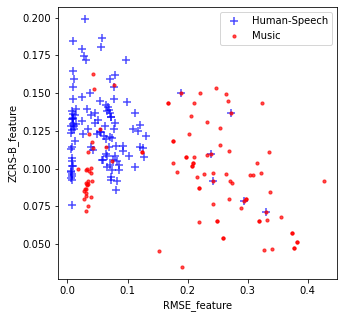

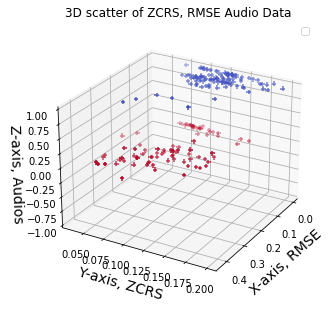

In [40]:
plt.subplots(figsize=(5, 5))
plt.xlabel('RMSE_feature')
plt.ylabel('ZCRS-B_feature')
X1=data.iloc[:,-5]
X2=data.iloc[:,-8]
plt.scatter(X1[y=='Human-Speech'], X2[y=='Human-Speech'], c='blue', marker= '+', s=50, alpha=0.7, label='Human-Speech')
plt.scatter(X1[y=='Music'], X2[y=='Music'],c='red', marker='o',s=10, alpha=0.7, label='Music')
plt.legend()


X = np.column_stack((X1,X2))
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(25, 30)
f = []
for i in y:
    if i=="Human-Speech":
        f.append(1)
    else:
        f.append(0)
f=np.array(f)
ax.scatter3D(X[:,0],X[:,1],f,marker='+',c = f<1,s=20,cmap = 'coolwarm')
ax.set_title('3D scatter of ZCRS, RMSE Audio Data')
ax.set_xlabel('X-axis, RMSE',fontsize=14)
ax.set_ylabel('Y-axis, ZCRS',fontsize=14)
ax.set_zlabel('Z-axis, Audios',fontsize=14)
ax.set_zlim(-1,1)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


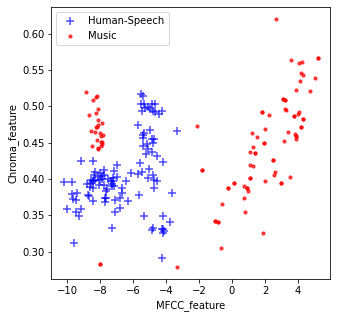

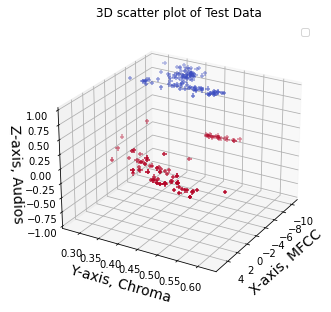

In [22]:
plt.subplots(figsize=(5, 5))
plt.xlabel('MFCC_feature')
plt.ylabel('Chroma_feature')
X1=data.iloc[:,-7]
X2=data.iloc[:,-6]
plt.scatter(X1[y=='Human-Speech'], X2[y=='Human-Speech'], c='blue', marker= '+', s=50, alpha=0.7, label='Human-Speech')
plt.scatter(X1[y=='Music'], X2[y=='Music'],c='red', marker='o',s=10, alpha=0.7, label='Music')
plt.legend()


X = np.column_stack((X1,X2))
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(25, 30)
f = []
for i in y:
    if i=="Human-Speech":
        f.append(1)
    else:
        f.append(0)
f=np.array(f)
ax.scatter3D(X[:,0],X[:,1],f,marker='+',c = f<1,s=20,cmap = 'coolwarm')
ax.set_title('3D scatter plot of Test Data')
ax.set_xlabel('X-axis, MFCC',fontsize=14)
ax.set_ylabel('Y-axis, Chroma',fontsize=14)
ax.set_zlabel('Z-axis, Audios',fontsize=14)
ax.set_zlim(-1,1)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


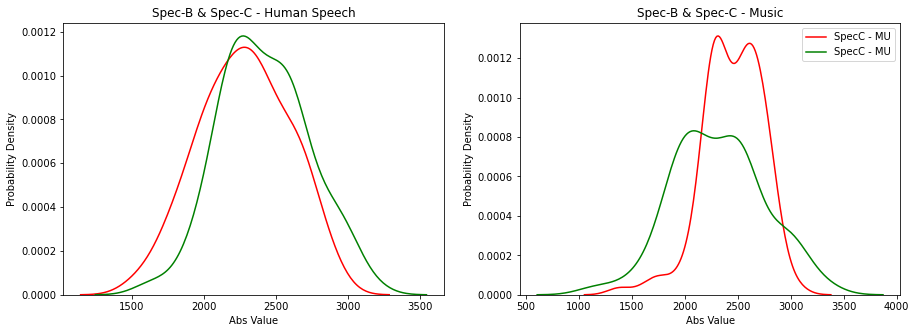

In [99]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as stats
import pylab as pl

X = np.array(data.iloc[:, :-1], dtype = float)

X2=data.iloc[:,-2] #rolloff
X3=data.iloc[:,-3] #specb
X4=data.iloc[:,-4] #specc
X5=data.iloc[:,-5] #rmse
X6=data.iloc[:,-6] #chroma
X7=data.iloc[:,-7] #mfcc
X8=data.iloc[:,-8] #zcrs

# sns.distplot(X1[y=='Human-Speech'])
# h = np.array(X1[y=='Human-Speech'])
# h.sort()
# hmean = np.mean(h)
# hstd = np.std(h)
# pdf = stats.norm.pdf(h, hmean, hstd)
# plt.plot(h, pdf)

# X = np.column_stack((X1,X2))
# print(X1[y=='Human-Speech'])
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Spec-B & Spec-C - Human Speech')
ax1.set_xlabel("Abs Value")
ax1.set_ylabel("Probability Density")
sns.kdeplot(X3[y=='Human-Speech'], ax = ax1, color ='red', label="SpecB - HS")
sns.kdeplot(X4[y=='Human-Speech'], ax = ax1, color ='green', label="SpecB - HS")
plt.legend()

ax2.set_title('Spec-B & Spec-C - Music')
ax2.set_xlabel("Abs Value")
ax2.set_ylabel("Probability Density")
sns.kdeplot(X3[y=='Music'], ax = ax2, color ='red', label="SpecC - MU")
sns.kdeplot(X4[y=='Music'], ax = ax2, color ='green', label="SpecC - MU")
plt.legend()

# sns.kdeplot(X[:,0], ax = ax1, color ='blue', label="Mixed")
# sns.kdeplot(X[:,-3], ax = ax1, color ='blue')

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X = scaler.transform(X)
# ax2.set_title('Features 4,5,6')
# sns.kdeplot(X[:,-4], ax = ax2, color ='r')
# sns.kdeplot(X[:,-5], ax = ax2, color ='g')
# sns.kdeplot(X[:,-6], ax = ax2, color ='b')

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X = scaler.transform(X)
# ax3.set_title('After Standar Scaling')
# sns.kdeplot(X[:,-5], ax = ax3, color ='red')
# sns.kdeplot(X[:,-6], ax = ax3, color ='blue')